# Proj: Bandit-Learning


Since 
$$\theta_1 < \theta_2 < \theta_3$$ 

In [20]:
import numpy as np

# 设置随机数种子（以保证可重复性）
np.random.seed(42)

def generate_truncated_normal_data(mean, variance, size):
    std_dev = np.sqrt(variance)
    
    # 生成符合正态分布的数据
    data = np.random.normal(mean, std_dev, size)
    
    # 将数据截断到0-1的范围
    data = np.clip(data, 0, 1)
    
    # 如果需要的数据量较少，可以多生成一些数据供截断后选择
    while len(data) < size:
        extra_data = np.random.normal(mean, std_dev, size * 2)
        extra_data = np.clip(extra_data, 0, 1)
        data = np.append(data, extra_data)
        data = data[:size]  # 只保留先前需要的数量
    
    return data

# 指定均值和方差
mean = 0.5
variance = 0.1

# 生成 3 个 0-1 之间的数据
data = generate_truncated_normal_data(mean, variance, 3)

print("Generated data:", data)
print("Mean of generated data:", np.mean(data))
print("Variance of generated data:", np.var(data))

Generated data: [0.65707481 0.45627699 0.7048171 ]
Mean of generated data: 0.6060562984515795
Variance of generated data: 0.011596808530983974


In [21]:
import numpy as np
import matplotlib.pyplot as plt

class ThetaSequence:
    def __init__(self, seq: np.ndarray, n_elements: int):
        self.seq = seq
        self.n_elem = n_elements
        self.mean = np.mean(seq)
        self.var = np.var(seq)
        self.max_theta = np.max(seq)

def generate_custom_theta_sequence_set(n_elem, n_sets):
    theta_seq_set = []
    max_std_dev = np.sqrt(1/6)
    
    # 生成均值和标准差的线性空间
    mean_values = np.linspace(0, 1, int(np.sqrt(n_sets)))  # 创建平均值范围
    std_dev_values = np.linspace(0, max_std_dev, int(np.sqrt(n_sets)))  # 创建标准差范围

    for mean in mean_values:
        for std_dev in std_dev_values:
            seq = np.random.normal(loc=mean, scale=std_dev, size=n_elem)
            seq = np.clip(seq, 0, 1)  # 把序列的值都限制在 0 和 1 之间
            theta_seq = ThetaSequence(seq, n_elem)
            theta_seq_set.append(theta_seq)
    
    return np.array(theta_seq_set)

# 示例使用：
n_elem = 100
n_sets = 100
theta_seq_set = generate_custom_theta_sequence_set(n_elem, n_sets)

# 检查生成的 theta 序列集合
for theta_seq in theta_seq_set:
    print(f"Mean: {theta_seq.mean:.2f}, Std Dev: {np.sqrt(theta_seq.var):.2f}")

Mean: 0.00, Std Dev: 0.00
Mean: 0.02, Std Dev: 0.03
Mean: 0.04, Std Dev: 0.06
Mean: 0.05, Std Dev: 0.08
Mean: 0.08, Std Dev: 0.12
Mean: 0.07, Std Dev: 0.11
Mean: 0.12, Std Dev: 0.17
Mean: 0.12, Std Dev: 0.18
Mean: 0.18, Std Dev: 0.24
Mean: 0.17, Std Dev: 0.23
Mean: 0.11, Std Dev: 0.00
Mean: 0.12, Std Dev: 0.05
Mean: 0.12, Std Dev: 0.09
Mean: 0.12, Std Dev: 0.11
Mean: 0.18, Std Dev: 0.15
Mean: 0.15, Std Dev: 0.16
Mean: 0.19, Std Dev: 0.21
Mean: 0.20, Std Dev: 0.22
Mean: 0.18, Std Dev: 0.22
Mean: 0.24, Std Dev: 0.27
Mean: 0.22, Std Dev: 0.00
Mean: 0.22, Std Dev: 0.04
Mean: 0.22, Std Dev: 0.09
Mean: 0.22, Std Dev: 0.13
Mean: 0.25, Std Dev: 0.16
Mean: 0.25, Std Dev: 0.22
Mean: 0.27, Std Dev: 0.21
Mean: 0.27, Std Dev: 0.25
Mean: 0.25, Std Dev: 0.29
Mean: 0.30, Std Dev: 0.30
Mean: 0.33, Std Dev: 0.00
Mean: 0.33, Std Dev: 0.04
Mean: 0.34, Std Dev: 0.10
Mean: 0.35, Std Dev: 0.15
Mean: 0.34, Std Dev: 0.18
Mean: 0.36, Std Dev: 0.24
Mean: 0.37, Std Dev: 0.22
Mean: 0.30, Std Dev: 0.26
Mean: 0.32, 

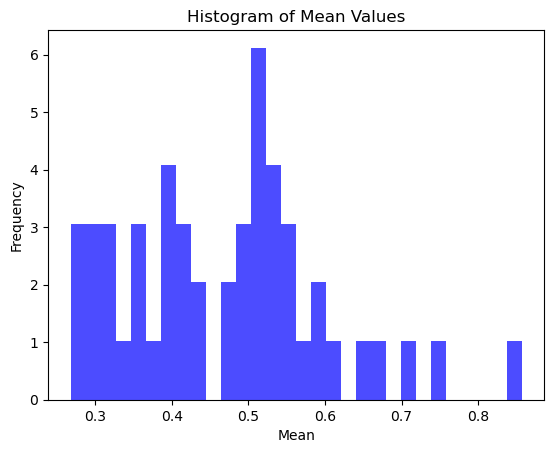

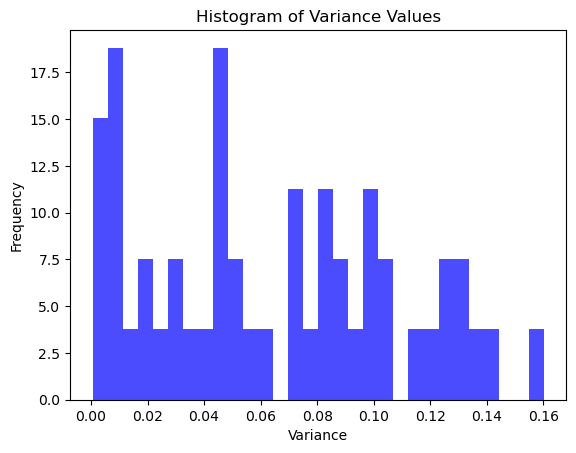

In [120]:
import numpy as np
import matplotlib.pyplot as plt

class ThetaSequence:
    def __init__(self, seq: np.ndarray, n_elements: int):
        self.seq = seq
        self.n_elem = n_elements
        self.mean = np.mean(seq)
        self.var = np.var(seq)
        self.max_theta = np.max(seq)

def generate_theta_sequence_set(n_elem, n_sets):
    theta_seq_set = []
    for _ in range(n_sets):
        theta_seq = ThetaSequence(np.random.uniform(0, 1, size=n_elem), n_elem)
        theta_seq_set.append(theta_seq)
    return np.array(theta_seq_set)


########################################

n_elem = 3
n_sets = 50

theta_seq_set = generate_theta_sequence_set(n_elem, n_sets)

# 提取 ThetaSequence 对象的 mean 属性作为数据序列
mean_values = [theta_seq.mean for theta_seq in theta_seq_set]
plt.hist(mean_values, bins=30, density=True, alpha=0.7, color='blue')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Values')
plt.show()

# 提取 ThetaSequence 对象的 variance 属性作为数据序列
variance_values = [theta_seq.var for theta_seq in theta_seq_set]
plt.hist(variance_values, bins=30, density=True, alpha=0.7, color='blue')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Histogram of Variance Values')
plt.show()

Experiment 1:
UCB c=1: Reward 4240.00, Oracle Value 4257.45
UCB c=5: Reward 4081.00, Oracle Value 4257.45
UCB c=10: Reward 3930.00, Oracle Value 4257.45
Epsilon-Greedy ε=0.1: Reward 4060.00, Oracle Value 4257.45
Epsilon-Greedy ε=0.5: Reward 3390.00, Oracle Value 4257.45
Epsilon-Greedy ε=0.9: Reward 2696.00, Oracle Value 4257.45
Best strategy and parameter: UCB c=1 with loss 17.45
UCB c=1: Rank 1
UCB c=5: Rank 2
UCB c=10: Rank 4
Epsilon-Greedy ε=0.1: Rank 3
Epsilon-Greedy ε=0.5: Rank 5
Epsilon-Greedy ε=0.9: Rank 6
Experiment 2:
UCB c=1: Reward 3121.00, Oracle Value 3228.35
UCB c=5: Reward 2996.00, Oracle Value 3228.35
UCB c=10: Reward 3017.00, Oracle Value 3228.35
Epsilon-Greedy ε=0.1: Reward 3110.00, Oracle Value 3228.35
Epsilon-Greedy ε=0.5: Reward 2919.00, Oracle Value 3228.35
Epsilon-Greedy ε=0.9: Reward 2569.00, Oracle Value 3228.35
Best strategy and parameter: UCB c=1 with loss 107.35
UCB c=1: Rank 1
UCB c=5: Rank 4
UCB c=10: Rank 3
Epsilon-Greedy ε=0.1: Rank 2
Epsilon-Greedy ε=0.

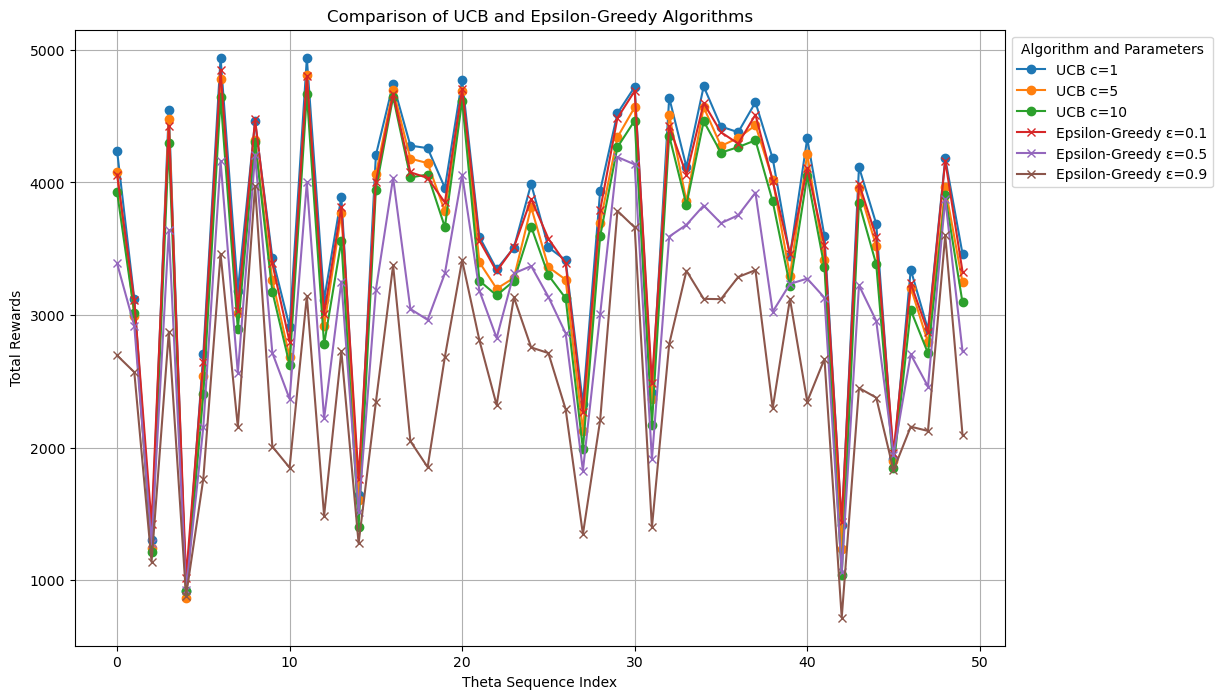

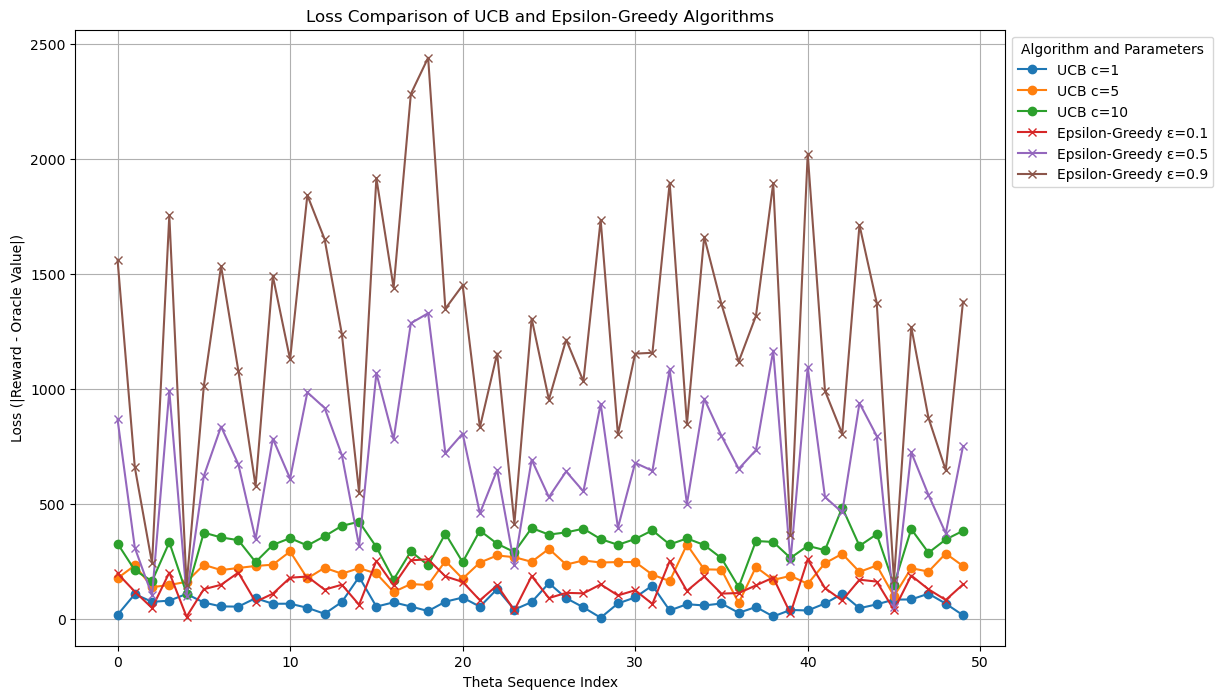

Best parameters and strategies for each experiment:
Experiment 1: UCB c=1
Experiment 2: UCB c=1
Experiment 3: Epsilon-Greedy ε=0.1
Experiment 4: UCB c=1
Experiment 5: Epsilon-Greedy ε=0.1
Experiment 6: UCB c=1
Experiment 7: UCB c=1
Experiment 8: UCB c=1
Experiment 9: Epsilon-Greedy ε=0.1
Experiment 10: UCB c=1
Experiment 11: UCB c=1
Experiment 12: UCB c=1
Experiment 13: UCB c=1
Experiment 14: UCB c=1
Experiment 15: Epsilon-Greedy ε=0.1
Experiment 16: UCB c=1
Experiment 17: UCB c=1
Experiment 18: UCB c=1
Experiment 19: UCB c=1
Experiment 20: UCB c=1
Experiment 21: UCB c=1
Experiment 22: UCB c=1
Experiment 23: UCB c=1
Experiment 24: Epsilon-Greedy ε=0.1
Experiment 25: UCB c=1
Experiment 26: Epsilon-Greedy ε=0.1
Experiment 27: UCB c=1
Experiment 28: UCB c=1
Experiment 29: UCB c=1
Experiment 30: UCB c=1
Experiment 31: UCB c=1
Experiment 32: Epsilon-Greedy ε=0.1
Experiment 33: UCB c=1
Experiment 34: UCB c=1
Experiment 35: UCB c=1
Experiment 36: UCB c=1
Experiment 37: UCB c=1
Experiment 38: 

In [126]:
import numpy as np
import matplotlib.pyplot as plt

class ThetaSequence:
    def __init__(self, seq):
        self.seq = seq

def generate_theta_sequence_set(n_elem, n_sets):
    theta_seq_set = [ThetaSequence(np.random.uniform(0, 1, size=n_elem)) for _ in range(n_sets)]
    return theta_seq_set

def simulate_ucb(theta, c, num_pulls_per_experiment):
    num_arms = len(theta)
    total_rewards = np.zeros(num_arms)
    counts = np.zeros(num_arms)
    
    for _ in range(num_pulls_per_experiment):
        if np.any(counts == 0):
            arm = np.random.randint(num_arms)
        else:
            ucb_values = (total_rewards / np.maximum(counts, 1)) + np.sqrt((2 * np.log(np.sum(counts)) * c) / np.maximum(counts, 1))
            arm = np.argmax(ucb_values)
        counts[arm] += 1
        reward = np.random.binomial(1, theta[arm])
        total_rewards[arm] += reward

    return total_rewards.sum()

def simulate_epsilon_greedy(theta, epsilon, num_pulls_per_experiment):
    num_arms = len(theta)
    total_rewards = np.zeros(num_arms)
    counts = np.zeros(num_arms)
    
    for _ in range(num_pulls_per_experiment):
        arm = np.random.randint(num_arms) if np.random.rand() < epsilon else np.argmax(theta)
        counts[arm] += 1
        reward = np.random.binomial(1, theta[arm])
        total_rewards[arm] += reward

    return total_rewards.sum()

def oracle_value(theta):
    return np.max(theta) * num_pulls_per_experiment

# 设置参数
n_elem = 3
n_sets = 50
ucb_cs = [1, 5, 10]
epsilons = [0.1, 0.5, 0.9]
num_pulls_per_experiment = 5000

# 生成ThetaSequence集合
theta_seq_set = generate_theta_sequence_set(n_elem, n_sets)

# 初始化结果存储
ucb_results = {c: [] for c in ucb_cs}
epsilon_greedy_results = {epsilon: [] for epsilon in epsilons}
best_params_each_experiment = []
losses_per_experiment = []

# 模拟实验并记录排名
for idx, theta_seq in enumerate(theta_seq_set):
    print(f"Experiment {idx + 1}:")
    theta = theta_seq.seq
    theta_oracle = oracle_value(theta)
    all_rewards = []
    labels = []
    
    # 模拟UCB策略
    for c in ucb_cs:
        reward = simulate_ucb(theta, c, num_pulls_per_experiment)
        all_rewards.append(reward)
        labels.append(f'UCB c={c}')
        print(f"UCB c={c}: Reward {reward:.2f}, Oracle Value {theta_oracle:.2f}")
    
    # 模拟epsilon-greedy策略
    for epsilon in epsilons:
        reward = simulate_epsilon_greedy(theta, epsilon, num_pulls_per_experiment)
        all_rewards.append(reward)
        labels.append(f'Epsilon-Greedy ε={epsilon}')
        print(f"Epsilon-Greedy ε={epsilon}: Reward {reward:.2f}, Oracle Value {theta_oracle:.2f}")
    
    # 计算损失和最接近Oracle的策略和参数
    losses = [abs(reward - theta_oracle) for reward in all_rewards]
    losses_per_experiment.append(losses)
    min_loss_idx = np.argmin(losses)
    best_param = labels[min_loss_idx]
    print(f"Best strategy and parameter: {best_param} with loss {losses[min_loss_idx]:.2f}")
    best_params_each_experiment.append(best_param)
    
    # 计算排名
    ranks = np.argsort(-np.array(all_rewards))
    rank_results = dict(zip(labels, ranks + 1))
    
    # 打印排名结果
    for label, rank in rank_results.items():
        print(f"{label}: Rank {rank}")
    
    # 按排名存储结果
    for c in ucb_cs:
        ucb_results[c].append(all_rewards[labels.index(f'UCB c={c}')])
    for epsilon in epsilons:
        epsilon_greedy_results[epsilon].append(all_rewards[labels.index(f'Epsilon-Greedy ε={epsilon}')])

# 绘制结果
plt.figure(figsize=(12, 8))

# 绘制UCB策略的结果
for c, rewards in ucb_results.items():
    plt.plot(rewards, label=f'UCB c={c}', marker='o')

# 绘制epsilon-greedy策略的结果
for epsilon, rewards in epsilon_greedy_results.items():
    plt.plot(rewards, label=f'Epsilon-Greedy ε={epsilon}', marker='x')

plt.title('Comparison of UCB and Epsilon-Greedy Algorithms')
plt.xlabel('Theta Sequence Index')
plt.ylabel('Total Rewards')
plt.legend(title='Algorithm and Parameters', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# 绘制损失折线图
plt.figure(figsize=(12, 8))

# 绘制UCB策略的损失
for idx, c in enumerate(ucb_cs):
    ucb_losses = [losses[idx] for losses in losses_per_experiment]
    plt.plot(ucb_losses, label=f'UCB c={c}', marker='o')

# 绘制epsilon-greedy策略的损失
for idx, epsilon in enumerate(epsilons):
    epsilon_losses = [losses[len(ucb_cs) + idx] for losses in losses_per_experiment]
    plt.plot(epsilon_losses, label=f'Epsilon-Greedy ε={epsilon}', marker='x')

plt.title('Loss Comparison of UCB and Epsilon-Greedy Algorithms')
plt.xlabel('Theta Sequence Index')
plt.ylabel('Loss (|Reward - Oracle Value|)')
plt.legend(title='Algorithm and Parameters', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# 打印每次实验中表现最好的策略和参数
print("Best parameters and strategies for each experiment:")
for i, best_param in enumerate(best_params_each_experiment):
    print(f"Experiment {i + 1}: {best_param}")

In [122]:
class ThetaSequence:
    def __init__(self, seq: np.ndarray, n_elements: int):
        self.seq = seq
        self.n_elem = n_elements
        self.mean = np.mean(seq)
        self.var = np.var(seq)

## 根据theta生成beta分布先验
def beta_prio_generate(theta_seq_set: np.ndarray, min_n_trails: int):
  para_set_min = []
  para_set_10_min = []
  para_set_100_min = []
  for theta_seq in theta_seq_set:
    for k in range(3):
      para = []
      for theta in theta_seq.seq:
        res = np.random.binomial(1, theta, (10 ** k)*min_n_trails)
        para.append([np.sum(res), (10 ** k)*min_n_trails - np.sum(res)])
      if k==0:
        para_set_min.append(para)
      elif k==1:
        para_set_10_min.append(para)
      else:
        para_set_100_min.append(para)

  return np.array(para_set_min), np.array(para_set_10_min), np.array(para_set_100_min)
  
## 性能优化：所有数组先申请好成1，最后再增加
para_exp_0, para_exp_1, para_exp_2 = beta_prio_generate(theta_seq_set, min_n_trails=10)



50
done!


In [123]:
## 参数修正后的TS

## 问题是没有得到最终的策略
def Thompson_Sampling_once(n_arms, n_trials, beta_prio):
  ## 手动都进行+1
  for i in range(n_arms):
    beta_prio[i][0] += 1
    beta_prio[i][1] += 1
  sampled_theta = np.zeros(n_arms)
  reward = np.zeros(n_arms, dtype=int)
  for _ in range(n_trials):
    for i in range(n_arms):
      sampled_theta[i] = np.random.beta(beta_prio[i][0],beta_prio[i][1])
    max_arm = np.argmax(sampled_theta)
    cor_reward = np.random.binomial(1, sampled_theta[max_arm])
    beta_prio[max_arm][0] += cor_reward
    beta_prio[max_arm][1] +=  (1 - cor_reward) 
    reward[max_arm] += cor_reward

  for i in range(n_arms):
    ## final update
    sampled_theta[i] = np.random.beta(beta_prio[i][0],beta_prio[i][1])  
  # print(np.sum(reward))
  return np.sum(reward)       ##, sampled_theta   这里就不输出了

final_reward_para_exp_0 = []
final_reward_para_exp_1 = []
final_reward_para_exp_2 = []


print("I'm calculating, plz wait.")
for i in range(len(theta_seq_set)):
  ## 对第i组theta做500次实验，取平均
  reward_0, reward_1, reward_2 = [], [], []

  ## 5次实验，5000 time slots，否则真有点久
  for j in range(5):
    reward_0.append(Thompson_Sampling_once(3, 5000, para_exp_0[i]))
    reward_1.append(Thompson_Sampling_once(3, 5000, para_exp_1[i]))
    reward_2.append(Thompson_Sampling_once(3, 5000, para_exp_2[i]))
  final_reward_para_exp_0.append(np.mean(np.array(reward_0)))
  final_reward_para_exp_1.append(np.mean(np.array(reward_1)))
  final_reward_para_exp_2.append(np.mean(np.array(reward_2)))


# for i in range(len(theta_seq_set)):
#   print(str(theta_seq_set[i].max_theta * 5000)+" "+str(final_reward_para_exp_0[i])+" "+str(final_reward_para_exp_1[i])+" "+str(final_reward_para_exp_2[i]))
#   print("delta:" + str(final_reward_para_exp_0[i]-theta_seq_set[i].max_theta * 5000) + str(final_reward_para_exp_0[i]-theta_seq_set[i].max_theta * 5000) + str(final_reward_para_exp_0[i]-theta_seq_set[i].max_theta * 5000))

# print(final_reward_para_exp_0)
# print(final_reward_para_exp_1)
# print(final_reward_para_exp_2)
arm_static=[]
for i in range(len(theta_seq_set)):
    # 获取格式化的原数值字符串
    values_str = "{:.1f} {:.1f} {:.1f} {:.1f}".format(
        theta_seq_set[i].max_theta * 5000,
        final_reward_para_exp_0[i],
        final_reward_para_exp_1[i],
        final_reward_para_exp_2[i]
    )
    
    # 计算各delta值
    delta_0 = final_reward_para_exp_0[i] - theta_seq_set[i].max_theta * 5000
    delta_1 = final_reward_para_exp_1[i] - theta_seq_set[i].max_theta * 5000
    delta_2 = final_reward_para_exp_2[i] - theta_seq_set[i].max_theta * 5000
    
    # 获取格式化的delta字符串
    delta_str = "delta: {:.1f} {:.1f} {:.1f}".format(delta_0, delta_1, delta_2)
    delta = [abs(delta_0),abs(delta_1),abs(delta_2)]
    # 打印原数值和delta，保证delta字符串右对齐
    print(values_str)
    print(delta_str.rjust(len(values_str)))
    print("Theta-Var: {:.4f}   best-arm: {:1}".format(theta_seq_set[i].var, 1+np.argmin([delta])))
    arm_static.append(1+np.argmin([delta]))
    print()
    ## 统计个数？

# 统计1，2，3的个数
count_1 = arm_static.count(1)
count_2 = arm_static.count(2)
count_3 = arm_static.count(3)

# 打印统计结果
print(f"Count of 1: {count_1}")
print(f"Count of 2: {count_2}")
print(f"Count of 3: {count_3}")

# 准备绘图数据
labels = ['10', '100', '1000']
counts = [count_1, count_2, count_3]

# 绘制条形图
plt.bar(labels, counts, color=['blue', 'green', 'red'])

# 设置标题和标签
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('xxxxxxxxx')

# 显示图表
plt.show()


I'm calculating, plz wait.


AttributeError: 'ThetaSequence' object has no attribute 'max_theta'

[0.4, 0.5, 0.9]    4500
0.4     4,6       40,60      400,600
0.5     5,5       50,50      500,500
0.9     9,1       90,10      900,100          
        4300      4400        4450
 
 

In [ ]:
for i in range(50):
  print(theta_seq_set[i].seq)

[0.06344667 0.94471456 0.10423056]
[0.73619779 0.68730688 0.92753395]
[0.95849637 0.34512078 0.33785404]
[0.04587784 0.21024852 0.99407215]
[0.85632035 0.04256258 0.7581032 ]
[0.13970159 0.81116441 0.75323525]
[0.3561694  0.58662427 0.54535495]
[0.36208441 0.4453699  0.90804097]
[0.13079012 0.06630382 0.41634033]
[0.46371298 0.98157455 0.96901274]
[0.56009348 0.37043356 0.01774468]
[0.09507276 0.46191637 0.85952001]
[0.35332852 0.76011049 0.52548836]
[0.03272318 0.76481793 0.49715346]
[0.84256997 0.56990016 0.72549558]
[0.02243343 0.05091461 0.35961783]
[0.98538454 0.12852132 0.97691079]
[0.49125527 0.98204332 0.21983417]
[0.47590198 0.3537943  0.0524215 ]
[0.24976081 0.28118597 0.30478201]
[0.59714373 0.70910318 0.57285978]
[0.93593575 0.05732338 0.30643072]
[0.70945333 0.05706074 0.7671775 ]
[0.5679372  0.20236195 0.34409594]
[0.98459862 0.54290414 0.67458587]
[0.62609162 0.17692936 0.33516546]
[0.88286831 0.4474932  0.20208242]
[0.52396903 0.53436947 0.36675866]
[0.24218241 0.271373

In [ ]:
import numpy as np
import scipy.stats as stats

## 可使用随机数生成theta
actual_theta = np.array([0.6,0.3,0.1])


def Thompson_Sampling(n_arms, n_trials, alpha, beta):
  theta = np.zeros(n_arms, dtype=float)
  reward = np.zeros(n_arms, dtype=int)
  for _ in range(n_trials):

    for i in range(n_arms):
    ## update
      theta[i] = np.random.beta(alpha[i], beta[i])
    
    ## select
    max_arm = np.argmax(theta)
    cor_reward = np.random.binomial(1, theta[max_arm])
    alpha[max_arm] += cor_reward
    beta[max_arm] +=  (1 - cor_reward)
  
    reward[max_arm] += cor_reward

  for i in range(n_arms):
    ## final update
    theta[i] = np.random.beta(alpha[i], beta[i])  
  return np.sum(reward), theta


def TS_simulation_mean(n_arms, n_trials, alpha_set, beta_set, set_index, n_experiment):
  simu_reward_set = []
  esti_theta_set = []

  for i in range(n_experiment):
    simu_reward, esti_theta = Thompson_Sampling(n_arms, n_trials, alpha_set[set_index], beta_set[set_index])
    simu_reward_set.append(simu_reward)
    esti_theta_set.append(esti_theta)

  return np.mean(np.array(simu_reward_set)), esti_theta_set




## TS (Thompson Sampling) Algorithm

In [ ]:
import numpy as np
import scipy.stats as stats

## 可使用随机数生成theta
actual_theta = np.array([0.6,0.3,0.1])


def Thompson_Sampling(n_arms, n_trials, alpha, beta):
  theta = np.zeros(n_arms, dtype=float)
  reward = np.zeros(n_arms, dtype=int)
  for _ in range(n_trials):

    for i in range(n_arms):
    ## update
      theta[i] = np.random.beta(alpha[i], beta[i])
    
    ## select
    max_arm = np.argmax(theta)
    cor_reward = np.random.binomial(1, theta[max_arm])
    alpha[max_arm] += cor_reward
    beta[max_arm] +=  (1 - cor_reward)
  
    reward[max_arm] += cor_reward

  for i in range(n_arms):
    ## final update
    theta[i] = np.random.beta(alpha[i], beta[i])  
  return np.sum(reward), theta


def TS_simulation_mean(n_arms, n_trials, alpha_set, beta_set, set_index, n_experiment):
  simu_reward_set = []
  esti_theta_set = []

  for i in range(n_experiment):
    simu_reward, esti_theta = Thompson_Sampling(n_arms, n_trials, alpha_set[set_index], beta_set[set_index])
    simu_reward_set.append(simu_reward)
    esti_theta_set.append(esti_theta)

  return np.mean(np.array(simu_reward_set)), esti_theta_set

In [ ]:
N_trials = 5000
arms = 3
n_para_set = 3

n_set = 2
alpha_set = np.array([np.array([6, 3, 1]), np.array([60, 30, 10]), np.array([600, 300, 100])])
beta_set = np.array([np.array([4, 7, 9]), np.array([40, 70, 90]),np.array([400, 700, 900])])

n_experi = 200

for i in range(n_para_set):
  simu_reward, _ = TS_simulation_mean(arms, N_trials, alpha_set, beta_set, i, n_experi)
  print(simu_reward)

4303.51
2974.0
3080.015


In [ ]:
3269
3251
3018

3714
2437
2930

3427
2913
2972

3677
2971
2982

3016
3244
2995



2995

print(f"Pulls per arm: {pulls}")
print(f"Total rewards per arm: {rewards}")
print(f"Cumulative regret: {regret}")

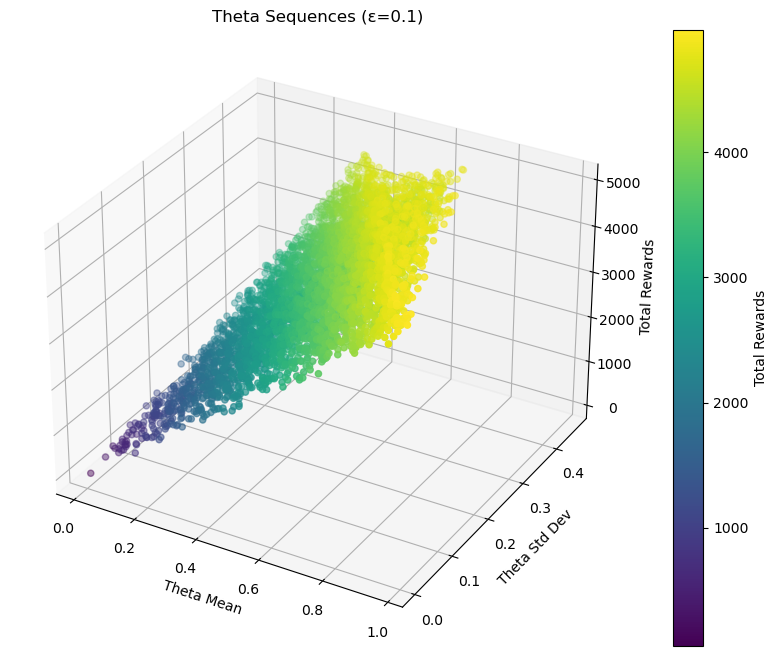

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class ThetaSequence:
    def __init__(self, seq):
        self.seq = seq

def generate_theta_sequence_set(n_elem, n_sets):
    theta_seq_set = [ThetaSequence(np.random.uniform(0, 1, size=n_elem)) for _ in range(n_sets)]
    return theta_seq_set

def simulate_epsilon_greedy(theta, epsilon, num_pulls_per_experiment):
    num_arms = len(theta)
    total_rewards = np.zeros(num_arms)
    counts = np.zeros(num_arms)
    
    for _ in range(num_pulls_per_experiment):
        arm = np.random.randint(num_arms) if np.random.rand() < epsilon else np.argmax(theta)
        counts[arm] += 1
        reward = np.random.binomial(1, theta[arm])
        total_rewards[arm] += reward

    return total_rewards.sum()

# 设置参数
n_elem = 3
n_sets = 5000
epsilon = 0.1
num_pulls_per_experiment = 5000

# 生成ThetaSequence集合
theta_seq_set = generate_theta_sequence_set(n_elem, n_sets)

# 计算每个序列的平均值和标准差，并模拟epsilon-greedy算法
theta_means = []
theta_stds = []
theta_rewards = []

for theta_seq in theta_seq_set:
    theta = theta_seq.seq
    theta_means.append(np.mean(theta))
    theta_stds.append(np.std(theta))
    reward = simulate_epsilon_greedy(theta, epsilon, num_pulls_per_experiment)
    theta_rewards.append(reward)

# 绘制三维图像
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(theta_means, theta_stds, theta_rewards, c=theta_rewards, cmap='viridis', marker='o')

ax.set_title(f'Theta Sequences (ε={epsilon})')
ax.set_xlabel('Theta Mean')
ax.set_ylabel('Theta Std Dev')
ax.set_zlabel('Total Rewards')

# 添加颜色条
cbar = plt.colorbar(sc)
cbar.set_label('Total Rewards')

plt.show()

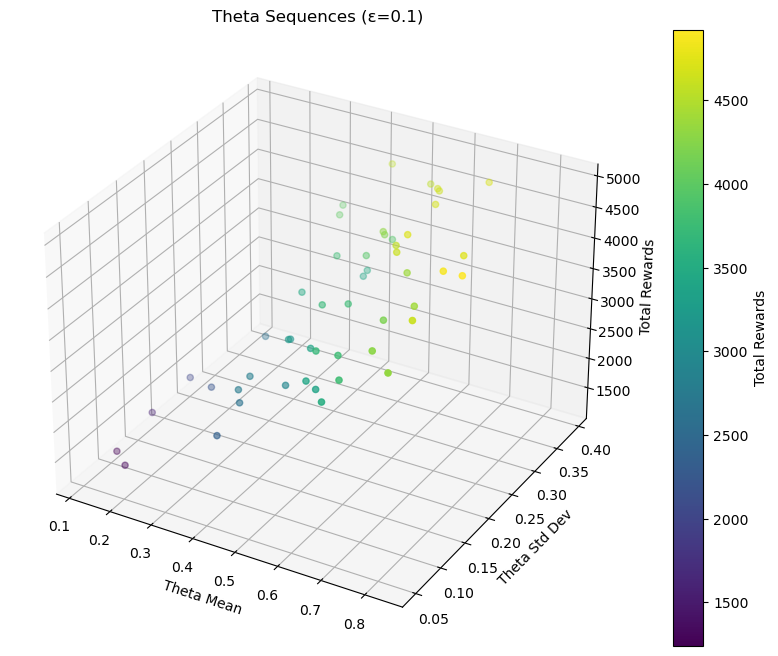

MovieWriter imagemagick unavailable; using Pillow instead.
/Users/Frank/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


KeyboardInterrupt: 

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

class ThetaSequence:
    def __init__(self, seq):
        self.seq = seq

def generate_theta_sequence_set(n_elem, n_sets):
    theta_seq_set = [ThetaSequence(np.random.uniform(0, 1, size=n_elem)) for _ in range(n_sets)]
    return theta_seq_set

def simulate_epsilon_greedy(theta, epsilon, num_pulls_per_experiment):
    num_arms = len(theta)
    total_rewards = np.zeros(num_arms)
    counts = np.zeros(num_arms)
    
    for _ in range(num_pulls_per_experiment):
        arm = np.random.randint(num_arms) if np.random.rand() < epsilon else np.argmax(theta)
        counts[arm] += 1
        reward = np.random.binomial(1, theta[arm])
        total_rewards[arm] += reward

    return total_rewards.sum()

# 设置参数
n_elem = 3
n_sets = 50
epsilon = 0.1
num_pulls_per_experiment = 5000

# 生成ThetaSequence集合
theta_seq_set = generate_theta_sequence_set(n_elem, n_sets)

# 计算每个序列的平均值和标准差，并模拟epsilon-greedy算法
theta_means = []
theta_stds = []
theta_rewards = []

for theta_seq in theta_seq_set:
    theta = theta_seq.seq
    theta_means.append(np.mean(theta))
    theta_stds.append(np.std(theta))
    reward = simulate_epsilon_greedy(theta, epsilon, num_pulls_per_experiment)
    theta_rewards.append(reward)

# 绘制三维图像，并添加旋转功能
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(theta_means, theta_stds, theta_rewards, c=theta_rewards, cmap='viridis', marker='o')

ax.set_title(f'Theta Sequences (ε={epsilon})')
ax.set_xlabel('Theta Mean')
ax.set_ylabel('Theta Std Dev')
ax.set_zlabel('Total Rewards')

# 添加颜色条
cbar = plt.colorbar(sc)
cbar.set_label('Total Rewards')

# 更新函数，用于旋转视角
def update(frame):
    ax.view_init(elev=30., azim=frame)

# 创建动画
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), interval=100)

# 显示动画
plt.show()

# 保存动画（如果需要）
# ani.save('3d_scatter_rotation.gif', writer='imagemagick')

In [49]:
## specific_theta_geneta
import numpy as np
import matplotlib.pyplot as plt

class ThetaSequence:
    def __init__(self, seq: np.ndarray, n_elements: int):
        self.seq = seq
        self.n_elem = n_elements
        self.mean = np.mean(seq)
        self.var = np.var(seq)
        self.max_theta = np.max(seq)

## randomly generate
def generate_theta_sequence_set(n_elem, n_sets):
    theta_seq_set = []
    for _ in range(n_sets):
        theta_seq = ThetaSequence(np.random.uniform(0, 1, size=n_elem), n_elem)
        theta_seq_set.append(theta_seq)
    return np.array(theta_seq_set)

## 用theta组的数值特征，判断不同参数对不同特征的适应性
## 每个theta 跑200次，每次5000下摇杆

## 数值大小随意，数值特征重要
# 均值0.05为跨度，标准差1/20为跨度

## 使用固定的均值、标准差，生成n和数据（theta_seq）
def specific_theta_generate(mean, std_dev, n):
  # np.random.seed(0)  # 设置随机种子以确保结果可复现
  flag = False
  while not flag:
    flag = True
    theta_array = np.random.normal(loc=mean, scale=std_dev, size=n)
    # for i in theta_array:
    #   if i <= 0 or i >=1:
    #     flag = False
    #     break
  return ThetaSequence(theta_array,n)

## 静均值，动标准差
def theta_generate_static_mean_rolling_std_dev(size, mean, start_std_dev, end_std_dev, span):
  theta_set = []
  for rolling_std_dev in np.arange(start_std_dev, end_std_dev, span):
     theta_set.append(specific_theta_generate(mean, rolling_std_dev, size))
  return np.array(theta_set)

## 静标准差，动均值
def theta_generate_static_std_dev_rolling_mean(size, std_dev, start_mean, end_mean, span):
  theta_set = []
  for rolling_mean in np.arange(start_mean, end_mean, span):
     theta_set.append(specific_theta_generate(rolling_mean, std_dev, size))
  return np.array(theta_set)


# 已知的均值和方差
known_mean = 0.5
known_var = 1/6


print(theta_generate_static_mean_rolling_std_dev(3,0.5,0.1,0.9,0.1)[2].mean)






0.39482619913129097
